<a href="https://colab.research.google.com/github/JAYSHANKAR0205/ML-projects/blob/main/Customer_Churn_Prediction_using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Customer Churn Prediction Using ANN(Artificial Neural Network)


In [3]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('/Churn_Modelling.csv')
print(df.shape)
df.head()


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [11]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
df["Gender"]=le.fit_transform(df["Gender"])
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [13]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
print(x_train)

[[ 0.35649971 -0.9055496   0.91324755 ...  0.64920267  0.97481699
   1.36766974]
 [-0.20389777  0.30164867  0.91324755 ...  0.64920267  0.97481699
   1.6612541 ]
 [-0.96147213  1.50884694  0.91324755 ...  0.64920267 -1.02583358
  -0.25280688]
 ...
 [ 0.86500853 -0.9055496  -1.09499335 ... -1.54035103 -1.02583358
  -0.1427649 ]
 [ 0.15932282 -0.9055496   0.91324755 ...  0.64920267 -1.02583358
  -0.05082558]
 [ 0.47065475  0.30164867  0.91324755 ...  0.64920267  0.97481699
  -0.81456811]]


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(units=11,activation="relu",input_dim=10))
model.add(Dense(units=6,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200 (800.00 B)

 Trainable params: 200 (800.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5908 - loss: 0.6791 - val_accuracy: 0.8012 - val_loss: 0.5352
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8033 - loss: 0.5023 - val_accuracy: 0.8163 - val_loss: 0.4462
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.4573 - val_accuracy: 0.8219 - val_loss: 0.4261
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8159 - loss: 0.4368 - val_accuracy: 0.8231 - val_loss: 0.4137
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.4217 - val_accuracy: 0.8375 - val_loss: 0.4019
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.4020 - val_accuracy: 0.8431 - val_loss: 0.3937
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8368 - loss: 0.3992 - val_accuracy: 0.8400 - val_loss: 0.3871
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.3867 - val_accuracy: 0.

In [19]:
model.layers[1].get_weights()

[array([[ 0.17853463, -0.08923193,  0.35730726,  0.06535538, -0.27256784,
          0.49959987],
        [-0.327679  ,  0.07954671, -0.8249355 , -0.35623097, -0.49776635,
          0.04518932],
        [-0.5743407 , -0.7497301 ,  1.1331608 , -0.23184127, -0.574915  ,
         -0.391341  ],
        [-0.43720374,  0.6829846 , -0.03823011, -0.10562631, -0.12478352,
         -0.02854913],
        [-0.3702143 ,  0.17532612,  0.05886381, -0.05747361, -0.30984086,
          0.33044037],
        [ 0.25501397, -0.32400575,  0.43859777, -0.13739337,  0.01883188,
         -0.5567975 ],
        [ 0.19379918,  0.6013192 , -0.6095375 , -0.28146914,  0.4703393 ,
          0.18910097],
        [-0.32321426,  0.6884697 , -0.12961791, -0.55334634,  0.13059501,
         -0.12738353],
        [-0.16867301,  0.21323894,  0.24245714,  0.06997725,  0.47524172,
          0.35109043],
        [-0.2973315 ,  0.1805604 ,  0.07304806, -0.27323902, -0.28961384,
          0.14615573],
        [ 0.6364677 , -0.27898

In [20]:
prediction=model.predict(x_train)
y_pred=np.where(prediction>0.5,1,0)
print(y_pred)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.858625

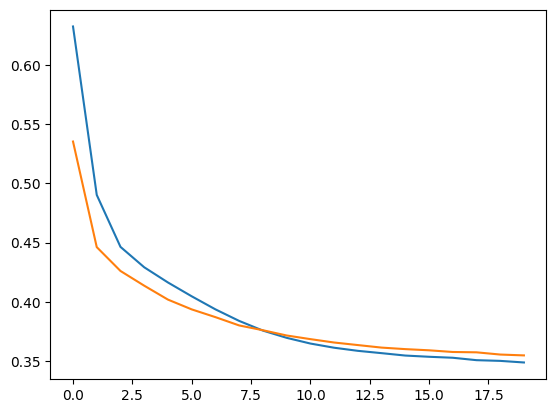

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

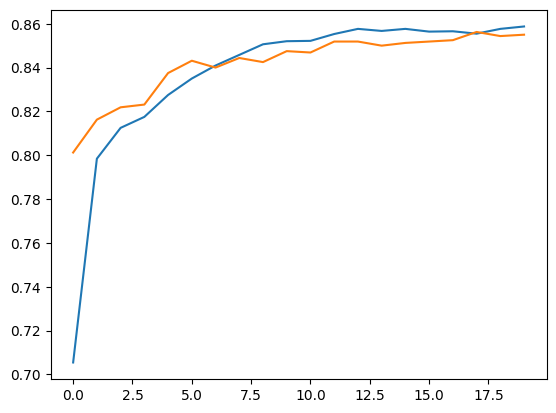

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])